In [29]:
import pandas as pd
import numpy as np
import altair as alt
import requests
from bs4 import BeautifulSoup
import json
from sklearn.model_selection import train_test_split
from scipy.integrate import quad
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [30]:
from true_skill_through_time import *

In [31]:
games_ge_40_train_df = pd.read_csv("data/oos_eval/games_ge_40_train.csv")
games_ge_40_test_df = pd.read_csv("data/oos_eval/games_ge_40_test.csv")

In [32]:
games_ge_40_train_df.timestamp = pd.to_datetime(games_ge_40_train_df.timestamp)
games_ge_40_test_df.timestamp = pd.to_datetime(games_ge_40_test_df.timestamp)

In [10]:
self = TrueSkillThroughTimeApplied(games_ge_40_train_df)

In [188]:
print(games_ge_40_train_df.head().to_string())

             winner               loser  timestamp
0      Jake Kilrain          Jack Daley 1879-01-01
1      Jake Kilrain        Jem Driscoll 1879-02-01
2      Jake Kilrain           Dan Dwyer 1879-03-10
3  John L. Sullivan         Jack Curley 1879-03-13
4  John L. Sullivan  Johnny Cocky Woods 1879-03-14


In [189]:
self.learn_optimal_parameters()


gamma: 0.0200, sigma: 0.0200, beta: 0.0200, 
NLE: 6257.7669

gamma: 0.0200, sigma: 0.0200, beta: 0.0200, 
NLE: 6257.7669

gamma: 0.0200, sigma: 0.0200, beta: 0.0200, 
NLE: 6257.7669

gamma: 0.0200, sigma: 0.0200, beta: 0.0200, 
NLE: 6257.7669

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 11375.0479

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 11375.0480

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 11375.0479

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 11375.0479

gamma: 0.0281, sigma: 0.0281, beta: 0.0281, 
NLE: 5976.7386

gamma: 0.0281, sigma: 0.0281, beta: 0.0281, 
NLE: 5976.7386

gamma: 0.0281, sigma: 0.0281, beta: 0.0281, 
NLE: 5976.7386

gamma: 0.0281, sigma: 0.0281, beta: 0.0281, 
NLE: 5976.7386

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 5902.5022

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 5902.5022

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 5902.5022

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 5902.5022

gamma: 0.1000, sigm

In [11]:
#NLE: 5787.2494
optimal_gamma = 0.0740
optimal_sigma = 0.6008
optimal_beta = 0.2849

In [12]:
self.set_optimal_parameters(gamma = optimal_gamma, sigma = optimal_sigma, beta = optimal_beta)

In [13]:
skill_curves = self.set_skill_curves()

In [14]:
# https://sports.betmgm.com/en/blog/ranking-the-worlds-top-10-boxers/
# supringly Mike Tyson is not on this list
top_boxers_online = ['Muhammad Ali', 'Joe Louis', 'Sugar Ray Robinson', 'Rocky Marciano', 'Floyd Mayweather Jr', 'Manny Pacquiao', 'Jack Dempsey', 'Roberto Durán', 'Henry Armstrong', 'Willie Pep']

In [15]:
self.plot_player_skills(players = top_boxers_online[:]+['Mike Tyson'], width=1500, burnin=0)

alt.LayerChart(...)

In [16]:
self.plot_player_skills(players = top_boxers_online[:]+['Mike Tyson'], width=1500, burnin=10)

alt.LayerChart(...)

In [17]:
self.plot_calibration()

/Users/davidliu/Desktop/Python312/true_theta/posts/trueskill/true_skill_through_time.py:200: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_means = df.groupby('win_prob_bucket').agg(


alt.LayerChart(...)

### run tstt on the test set

In [18]:
self_test = TrueSkillThroughTimeApplied(games_ge_40_test_df)

In [19]:
self_test.learn_optimal_parameters()


gamma: 0.0200, sigma: 0.0200, beta: 0.0200, 
NLE: 2758.4420

gamma: 0.0200, sigma: 0.0200, beta: 0.0200, 
NLE: 2758.4420

gamma: 0.0200, sigma: 0.0200, beta: 0.0200, 
NLE: 2758.4420

gamma: 0.0200, sigma: 0.0200, beta: 0.0200, 
NLE: 2758.4420

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 3023.6470

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 3023.6470

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 3023.6470

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 3023.6470

gamma: 0.0404, sigma: 0.0404, beta: 0.0404, 
NLE: 2585.6686

gamma: 0.0404, sigma: 0.0404, beta: 0.0404, 
NLE: 2585.6686

gamma: 0.0404, sigma: 0.0404, beta: 0.0404, 
NLE: 2585.6686

gamma: 0.0404, sigma: 0.0404, beta: 0.0404, 
NLE: 2585.6686

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 2583.5043

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 2583.5043

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 2583.5043

gamma: 0.1000, sigma: 0.1000, beta: 0.1000, 
NLE: 2583.5043

gamma: 0.1000, sigma: 0

In [20]:
self_test.set_optimal_parameters(gamma = 0.1000, sigma = 1.2008, beta = 0.7815)

In [21]:
skill_curves = self_test.set_skill_curves()

In [22]:
self_test.plot_player_skills(players = top_boxers_online[:]+['Mike Tyson'], width=1500, burnin=0)

alt.LayerChart(...)

In [23]:
self_test.plot_calibration()

/Users/davidliu/Desktop/Python312/true_theta/posts/trueskill/true_skill_through_time.py:200: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_means = df.groupby('win_prob_bucket').agg(


alt.LayerChart(...)

#### remove matches in both train and test
#### for each player in the test set, get its skill mu and sigma from the latest match in their train set
#### mu_diff = winner_skill.mu - loser_skill.mu
#### sigma_diff = (winner_skill.sigma**2 + loser_skill.sigma**2 + 2*(self.beta_optimal**2))**0.5
#### win_prob, _ = quad(normal_pdf, 0, np.inf, args=(mu_diff, sigma_diff))
#### predictions.append(win_prob)
#### win_pred=1 if win_prob>=0.8 for example
#### then do a ROC with label on the test set(1 for win, 0 for lose)

In [200]:
games_ge_40_test_unique_df = games_ge_40_test_df[~games_ge_40_test_df.game_index.isin(games_ge_40_train_df.game_index.tolist())] 

### for those not on the skill_curve(because they are not in the training set, assume mean 0, sigma 1)

In [201]:
len(games_ge_40_test_unique_df), len(games_ge_40_test_df)

(4129, 4387)

In [209]:
skill_curves_dict = {}
for k, v in skill_curves.items():
    skill_curves_dict[k] = skill_curves[k][-1][1]

In [227]:
skill_curves_dict['Jeff Lacy'].mu

0.5586093366293742

In [213]:
skill_curves_df = pd.DataFrame(skill_curves_dict).T

In [215]:
skill_curves_df = skill_curves_df.rename(columns={0: 'mu', 1: 'sigma'})

In [216]:
skill_curves_df.head()

,mu,sigma
Charley Gomer,-0.162814,0.518013
Jeff Lacy,0.558609,0.468639
Juan José Estrada,0.677811,0.445146
Richard Williams,-0.239986,0.576279
Derrick Gainer,-0.036713,0.576437


In [219]:
#skill_curves_df.to_csv("data/oos_eval/skill_curves_last_in_train.csv")

In [220]:
games_ge_40_test_unique_df.head()

,game_index,winner,loser,timestamp
0,67,John L. Sullivan,Alf Greenfield,1885-01-12
1,74,John L. Sullivan,Jack Burke,1885-06-13
2,77,John L. Sullivan,Dominick McCaffrey,1885-08-29
3,104,John L. Sullivan,Frank Herald,1886-09-18
4,108,John L. Sullivan,Paddy Ryan,1886-11-13


In [231]:
games_ge_40_test_unique_df['winner_mu'] = games_ge_40_test_unique_df.apply(
                                        lambda row: skill_curves_dict[row.winner].mu if row.winner in skill_curves_dict else 0
                                        , axis=1)

/var/folders/sg/52_wwpld14z_lvc4rf4zy9x00000gn/T/ipykernel_61738/856779011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_ge_40_test_unique_df['winner_mu'] = games_ge_40_test_unique_df.apply(


In [232]:
games_ge_40_test_unique_df['winner_sigma'] = games_ge_40_test_unique_df.apply(
                                        lambda row: skill_curves_dict[row.winner].sigma if row.winner in skill_curves_dict else 1
                                        , axis=1)

/var/folders/sg/52_wwpld14z_lvc4rf4zy9x00000gn/T/ipykernel_61738/3690159485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_ge_40_test_unique_df['winner_sigma'] = games_ge_40_test_unique_df.apply(


In [233]:
games_ge_40_test_unique_df['loser_mu'] = games_ge_40_test_unique_df.apply(
                                        lambda row: skill_curves_dict[row.loser].mu if row.loser in skill_curves_dict else 0
                                        , axis=1)

/var/folders/sg/52_wwpld14z_lvc4rf4zy9x00000gn/T/ipykernel_61738/1438343284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_ge_40_test_unique_df['loser_mu'] = games_ge_40_test_unique_df.apply(


In [234]:
games_ge_40_test_unique_df['loser_sigma'] = games_ge_40_test_unique_df.apply(
                                        lambda row: skill_curves_dict[row.loser].sigma if row.loser in skill_curves_dict else 1
                                        , axis=1)

/var/folders/sg/52_wwpld14z_lvc4rf4zy9x00000gn/T/ipykernel_61738/4000603589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_ge_40_test_unique_df['loser_sigma'] = games_ge_40_test_unique_df.apply(


In [236]:
games_ge_40_test_unique_df['winner_mu_minus_loser_mu'] = games_ge_40_test_unique_df.winner_mu - games_ge_40_test_unique_df.loser_mu

/var/folders/sg/52_wwpld14z_lvc4rf4zy9x00000gn/T/ipykernel_61738/586389940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_ge_40_test_unique_df['winner_mu_minus_loser_mu'] = games_ge_40_test_unique_df.winner_mu - games_ge_40_test_unique_df.loser_mu


In [237]:
games_ge_40_test_unique_df['winner_loser_sigma'] = (games_ge_40_test_unique_df.winner_sigma**2 + games_ge_40_test_unique_df.loser_sigma**2 + 2*(optimal_beta**2)) ** 0.5

/var/folders/sg/52_wwpld14z_lvc4rf4zy9x00000gn/T/ipykernel_61738/1856003490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_ge_40_test_unique_df['winner_loser_sigma'] = (games_ge_40_test_unique_df.winner_sigma**2 + games_ge_40_test_unique_df.loser_sigma**2 + 2*(optimal_beta**2)) ** 0.5


In [241]:
# Define the normal PDF function
def normal_pdf(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)

In [260]:
norm.cdf(0, 0, 1)

np.float64(0.5)

In [246]:
# 12.3 secs
# games_ge_40_test_unique_df['winner_win_prob'] = games_ge_40_test_unique_df.apply(
#             lambda row: (quad(normal_pdf, 0, np.inf
#             , args=(row.winner_mu_minus_loser_mu, row.winner_loser_sigma))[0])
#             , axis=1)

/var/folders/sg/52_wwpld14z_lvc4rf4zy9x00000gn/T/ipykernel_61738/2887345988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_ge_40_test_unique_df['winner_win_prob'] = games_ge_40_test_unique_df.apply(lambda row: (quad(normal_pdf, 0, np.inf


In [267]:
games_ge_40_test_unique_df['winner_win_prob'] = games_ge_40_test_unique_df.apply(
            lambda row: norm.cdf(0, row.winner_mu_minus_loser_mu, row.winner_loser_sigma)
            , axis=1)

/var/folders/sg/52_wwpld14z_lvc4rf4zy9x00000gn/T/ipykernel_61738/3388438931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_ge_40_test_unique_df['winner_win_prob'] = games_ge_40_test_unique_df.apply(


In [252]:
games_ge_40_test_unique_df['label'] = 1

/var/folders/sg/52_wwpld14z_lvc4rf4zy9x00000gn/T/ipykernel_61738/3292527295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_ge_40_test_unique_df['label'] = 1


In [270]:
games_ge_40_test_unique_df.winner_win_prob.describe()

count    4129.000000
mean        0.332117
std         0.296034
min         0.000314
25%         0.103724
50%         0.208422
75%         0.558689
max         0.996609
Name: winner_win_prob, dtype: float64

In [268]:
len(games_ge_40_test_unique_df), len(games_ge_40_test_unique_df[games_ge_40_test_unique_df.winner_win_prob>0.5]) \
, len(games_ge_40_test_unique_df[games_ge_40_test_unique_df.winner_win_prob>0.8])

(4129, 1106, 546)

### accuracy with different threshold for the positive class

In [258]:
round(len(games_ge_40_test_unique_df[games_ge_40_test_unique_df.winner_win_prob>0.5])/len(games_ge_40_test_unique_df), 4), \
round(len(games_ge_40_test_unique_df[games_ge_40_test_unique_df.winner_win_prob>0.8])/len(games_ge_40_test_unique_df), 4)

(0.7321, 0.4805)

### reframe the problem to be did the high-rated player win the match?

In [261]:
games_ge_40_test_unique_df['high_mu_minus_low_mu'] = games_ge_40_test_unique_df.apply(
            lambda row: max(row.winner_mu, row.loser_mu) - min(row.winner_mu, row.loser_mu)
            , axis=1)

/var/folders/sg/52_wwpld14z_lvc4rf4zy9x00000gn/T/ipykernel_61738/2941546039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_ge_40_test_unique_df['high_mu_minus_low_mu'] = games_ge_40_test_unique_df.apply(


In [263]:
games_ge_40_test_unique_df['high_rated_win_prob'] = games_ge_40_test_unique_df.apply(
            lambda row: norm.cdf(0, row.high_mu_minus_low_mu, row.winner_loser_sigma)
            , axis=1)

/var/folders/sg/52_wwpld14z_lvc4rf4zy9x00000gn/T/ipykernel_61738/2481943367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_ge_40_test_unique_df['high_rated_win_prob'] = games_ge_40_test_unique_df.apply(


In [264]:
games_ge_40_test_unique_df.head()

,game_index,winner,loser,timestamp,winner_mu,winner_sigma,loser_mu,loser_sigma,winner_mu_minus_loser_mu,winner_loser_sigma,winner_win_prob,label,high_mu_minus_low_mu,high_rated_win_prob
0,67,John L. Sullivan,Alf Greenfield,1885-01-12,-0.258278,1.129551,-0.030131,0.578413,-0.228148,1.331459,0.431974,1,0.228148,0.431974
1,74,John L. Sullivan,Jack Burke,1885-06-13,-0.258278,1.129551,-0.044322,0.579919,-0.213956,1.332114,0.436199,1,0.213956,0.436199
2,77,John L. Sullivan,Dominick McCaffrey,1885-08-29,-0.258278,1.129551,0.000000,1.000000,-0.258278,1.561481,0.434312,1,0.258278,0.434312
3,104,John L. Sullivan,Frank Herald,1886-09-18,-0.258278,1.129551,0.000000,1.000000,-0.258278,1.561481,0.434312,1,0.258278,0.434312
4,108,John L. Sullivan,Paddy Ryan,1886-11-13,-0.258278,1.129551,-0.078450,0.555556,-0.179828,1.321690,0.445887,1,0.179828,0.445887


In [271]:
games_ge_40_test_unique_df[games_ge_40_test_unique_df.winner_win_prob!=games_ge_40_test_unique_df.high_rated_win_prob]

,game_index,winner,loser,timestamp,winner_mu,winner_sigma,loser_mu,loser_sigma,winner_mu_minus_loser_mu,winner_loser_sigma,label,high_mu_minus_low_mu,high_rated_win_prob,winner_win_prob
0,67,John L. Sullivan,Alf Greenfield,1885-01-12,-0.258278,1.129551,-0.030131,0.578413,-0.228148,1.331459,1,0.228148,0.431974,0.568026
1,74,John L. Sullivan,Jack Burke,1885-06-13,-0.258278,1.129551,-0.044322,0.579919,-0.213956,1.332114,1,0.213956,0.436199,0.563801
2,77,John L. Sullivan,Dominick McCaffrey,1885-08-29,-0.258278,1.129551,0.000000,1.000000,-0.258278,1.561481,1,0.258278,0.434312,0.565688
3,104,John L. Sullivan,Frank Herald,1886-09-18,-0.258278,1.129551,0.000000,1.000000,-0.258278,1.561481,1,0.258278,0.434312,0.565688
4,108,John L. Sullivan,Paddy Ryan,1886-11-13,-0.258278,1.129551,-0.078450,0.555556,-0.179828,1.321690,1,0.179828,0.445887,0.554113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,25603,Martin Bakole,Carlos Takam,2023-10-28,0.000000,1.000000,1.019094,0.389642,-1.019094,1.146367,1,1.019094,0.187008,0.812992
1334,25604,David Nyika,Robert Berridge,2023-11-03,0.000000,1.000000,0.588867,0.342252,-0.588867,1.131138,1,0.588867,0.301324,0.698676
1335,25613,Joseph Parker,Deontay Wilder,2023-12-23,0.869094,0.447944,1.780495,0.421501,-0.911401,0.735291,1,0.911401,0.107578,0.892422
1336,25632,Zhilei Zhang,Deontay Wilder,2024-06-01,0.000000,1.000000,1.780495,0.421501,-1.780495,1.157583,1,1.780495,0.062010,0.937990


In [273]:
games_ge_40_test_unique_df[games_ge_40_test_unique_df.winner=='Floyd Mayweather Jr']

,game_index,winner,loser,timestamp,winner_mu,winner_sigma,loser_mu,loser_sigma,winner_mu_minus_loser_mu,winner_loser_sigma,label,high_mu_minus_low_mu,high_rated_win_prob,winner_win_prob
2636,23964,Floyd Mayweather Jr,Miguel Cotto,2012-05-05,2.754817,0.435223,0.862029,0.539891,1.892789,0.802021,1,1.892789,0.009137,0.009137
2745,24494,Floyd Mayweather Jr,Marcos Rene Maidana,2014-05-03,2.754817,0.435223,1.056987,0.342062,1.697830,0.684661,1,1.697830,0.006573,0.006573
2744,24493,Floyd Mayweather Jr,Marcos Maidana,2014-05-03,2.754817,0.435223,-0.041115,0.572431,2.795932,0.824277,1,2.795932,0.000347,0.000347
1127,24494,Floyd Mayweather Jr,Marcos Rene Maidana,2014-05-03,2.754817,0.435223,1.056987,0.342062,1.697830,0.684661,1,1.697830,0.006573,0.006573
2767,24583,Floyd Mayweather Jr,Marcos Rene Maidana,2014-09-13,2.754817,0.435223,1.056987,0.342062,1.697830,0.684661,1,1.697830,0.006573,0.006573
2765,24581,Floyd Mayweather Jr,Marcos Maidana,2014-09-13,2.754817,0.435223,-0.041115,0.572431,2.795932,0.824277,1,2.795932,0.000347,0.000347
1140,24583,Floyd Mayweather Jr,Marcos Rene Maidana,2014-09-13,2.754817,0.435223,1.056987,0.342062,1.697830,0.684661,1,1.697830,0.006573,0.006573
2794,24700,Floyd Mayweather Jr,Manny Pacquiao,2015-05-02,2.754817,0.435223,-0.051499,0.567208,2.806317,0.820658,1,2.806317,0.000314,0.000314
2805,24765,Floyd Mayweather Jr,Andre Berto,2015-09-12,2.754817,0.435223,-0.017186,0.587322,2.772003,0.834687,1,2.772003,0.000448,0.000448
2873,25086,Floyd Mayweather Jr,Conor McGregor,2017-08-26,2.754817,0.435223,0.000000,1.000000,2.754817,1.162650,1,2.754817,0.008908,0.008908


In [272]:
#games_ge_40_test_unique_df.to_csv("data/oos_eval/games_ge_40_test_unique.csv", index=False)

### may not need to calculate the win_prob, if a player has a higher mu then we predict the player would win

In [276]:
round(len(games_ge_40_test_unique_df[games_ge_40_test_unique_df.winner_mu>games_ge_40_test_unique_df.loser_mu]) / len(games_ge_40_test_unique_df), 4)

0.7321

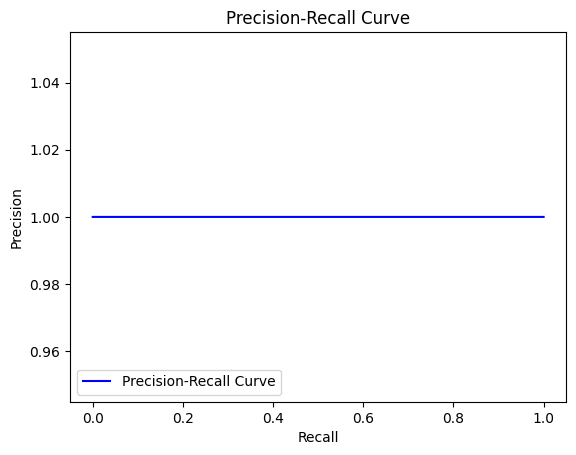

In [255]:
# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(games_ge_40_test_unique_df.label.to_numpy()
                                                       , games_ge_40_test_unique_df.winner_win_prob.to_numpy())

# Plot Precision-Recall curve
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### since we only have positive labels in our data

In [33]:
total_matches_train_df = games_ge_40_train_df.winner.value_counts().add(games_ge_40_train_df.loser.value_counts(), fill_value=0).sort_values()

In [34]:
total_matches_train_df.describe()

count    11232.000000
mean         3.017450
std         10.822923
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        235.000000
Name: count, dtype: float64

# To-Do's

- [ ] The `boxing_matches` dataset isn't quite in the right format. It needs to be the format seen in the `true_skill_wc3_dev.ipynb` notebook. The difference is, that has a `Winner` and `Loser` column. This data hasn't been organized that way, so some work needs to be done there.
- [ ] Once it's in the right format, apply the `TrueSkillThroughTimeApplied` class, in a similar way seen in the `true_skill_wc3_dev` notebook.
- [ ] You'll need to optimize the hyperparameters. You can use the `.learn_optimal_parameters` method for that.
- [ ] Inspect the results. Answer the question.. who is the Greatest Of All Time? FYI, it's OK to trim the results. We don't need to consider all matches since 1911.
- [ ] Read this paper for best practices on how to do this: https://www.herbrich.me/papers/ttt.pdf
- [ ] To make sure we're doing things right, check out this: https://glandfried.github.io/TrueSkillThroughTime.jl/man/examples/. We could run `TrueSkillThroughTimeApplied` on the data given their (there CSV file you can download.) We should be fine, since my code uses the repo developed on that site.
- [ ] Do some sort of out of sample test evaluation. Everything done so far has been in sample. We should hold out some future data and see if this model is good. 